# MAC0417/5768 - Visão e Processamento de Imagens (2021)

Exercício Programado 1

Gabriela Melo e Richard Block

Projeto GitHub: https://github.com/gabi-melo/image_processing

Base de imagens: https://photos.app.goo.gl/T73GsgXpvgCAVbPk6

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from itertools import product

#Ler metadados
metadata = pd.read_excel("./metadata.xlsx")

In [154]:
##Tabela Global

im = Image.open("./example_image.jpg")
width, height = im.size

tabela_global = pd.DataFrame({"Descrição": ["Número de classes", 
                                            "Número de imagens",
                                            "Tamanho da base (bytes)",
                                            "Resolução das imagens"],                             
                              "Valor": [metadata.groupby('classe').count().shape[0],
                                        metadata.groupby('classe').count()['exemplo'].sum(),
                                        "1.9 GB",
                                        im.size]})                                        

tabela_global

,Descrição,Valor
0,Número de classes,10
1,Número de imagens,1080
2,Tamanho da base (bytes),1.9 GB
3,Resolução das imagens,"(4000, 3000)"


In [201]:
##Tabela Detalhada

def f_tabela(df):
    return df.apply(np.unique)

tabela_classe = pd.DataFrame()
tabela_classe["n exemplos"] = metadata.groupby("classe")["exemplo"].max()
tabela_classe["var fundo"] = metadata.groupby(["classe"]).apply(f_tabela)[["fundo"]]
tabela_classe["var iluminação"] = metadata.groupby(["classe"]).apply(f_tabela)[["periodo"]]
tabela_classe["var local"] = metadata.groupby(["classe"]).apply(f_tabela)[["local"]]
tabela_classe["n repetições"] = metadata.groupby("classe")["repeticao"].max()
tabela_classe["total amostras"] = metadata.groupby("classe")["exemplo"].count()

tabela_classe.reset_index()

,classe,n exemplos,var fundo,var iluminação,var local,n repetições,total amostras
0,caneta,3,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",3,108
1,chave,3,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",3,108
2,chinelo,3,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",3,108
3,copo,3,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",3,108
4,escova,3,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",3,108
5,leite,3,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",3,108
6,livro,3,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",3,108
7,oculos,3,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",3,108
8,palheta,3,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",3,108
9,tesoura,3,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",3,108


In [258]:
s = tabela_classe.reset_index().iloc[0]

def select_ex(s):

    return list(product([s["classe"]], s["var iluminação"], s["var local"]))

selected = tabela_classe.reset_index().apply(select_ex, axis=1)
selected

0    [(caneta, dia, dentro), (caneta, dia, fora), (...
1    [(chave, dia, dentro), (chave, dia, fora), (ch...
2    [(chinelo, dia, dentro), (chinelo, dia, fora),...
3    [(copo, dia, dentro), (copo, dia, fora), (copo...
4    [(escova, dia, dentro), (escova, dia, fora), (...
5    [(leite, dia, dentro), (leite, dia, fora), (le...
6    [(livro, dia, dentro), (livro, dia, fora), (li...
7    [(oculos, dia, dentro), (oculos, dia, fora), (...
8    [(palheta, dia, dentro), (palheta, dia, fora),...
9    [(tesoura, dia, dentro), (tesoura, dia, fora),...
dtype: object

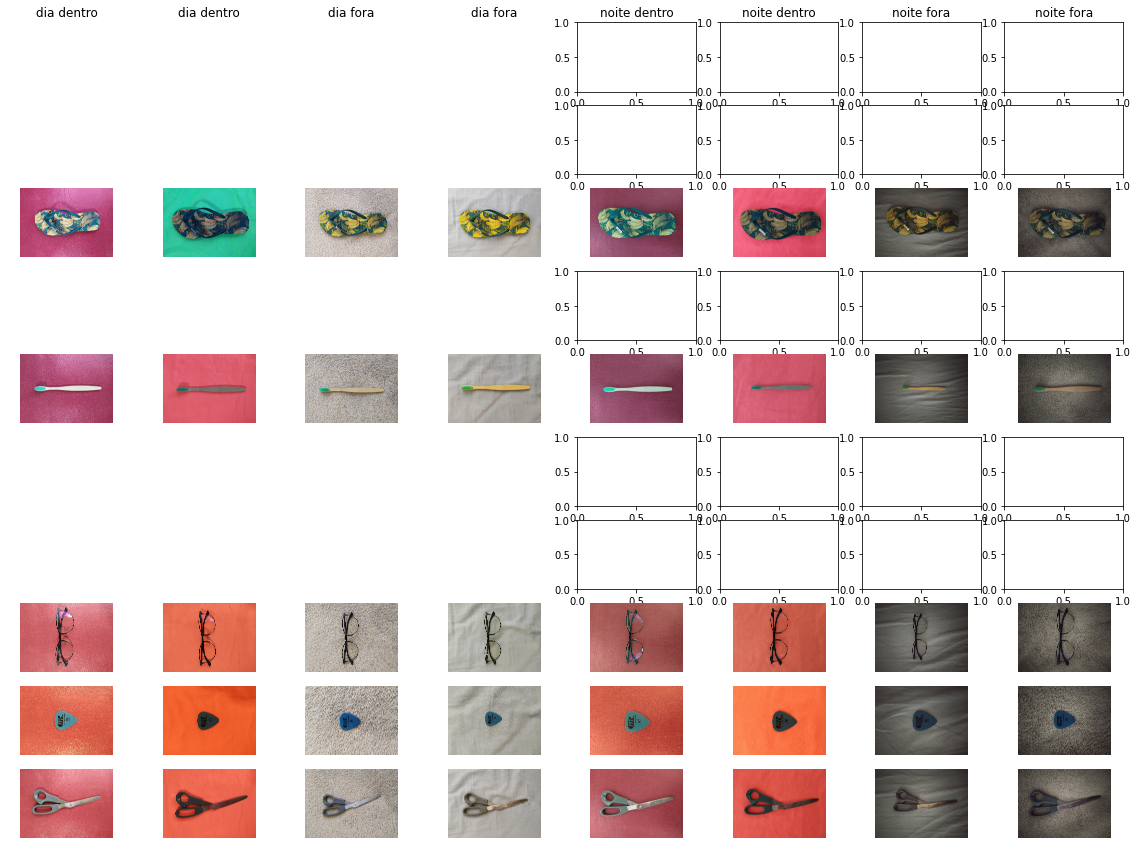

In [260]:
data_basepath = "/Users/gabimelo/Desktop/dataset/"

fig, axes = plt.subplots(10, 8, figsize=(20,15))

for x, val in selected.items():
    for y, ex in enumerate(val):

        c, i, l = ex
        
        try:
            paths = metadata[(metadata.classe == c) & 
                            (metadata.periodo == i) & 
                            (metadata.local == l) & 
                            (metadata.exemplo == 1) & 
                            (metadata.repeticao == 1)].arquivo.values[0:2]

            img = plt.imread(data_basepath + paths[0])
            axes[x,y*2].imshow(img)
            axes[x,y*2].set_axis_off()
            
            img = plt.imread(data_basepath + paths[1])
            axes[x,y*2+1].imshow(img)
            axes[x,y*2+1].set_axis_off()
            
        except:
            axes[x,y].set_axis_off()
            
        if x == 0:
            axes[x,y*2].set_title(ex[1] + " " + ex[2])
            axes[x,y*2+1].set_title(ex[1] + " " + ex[2])